In [1]:
import os
from astropy.io import fits
import matplotlib.pyplot as plt
import numpy as np
import re



In [2]:


# Step 1: List all .fit and .fits files in a directory
def list_fits_files(directory):
    fits_files = []
    for file in os.listdir(directory):
        if file.endswith(".fit") or file.endswith(".fits"):
            #fits_files.append(os.path.join(directory, file))  # add full path
            fits_files.append(file)  # add full path
    return fits_files

# Step 2: Read the header of each file in the array
def read_fits_headers(fits_files):
    headers = []
    for fits_file in fits_files:
        fits_file = os.path.join(directory, fits_file)
        with fits.open(fits_file) as hdul:
            header = hdul[0].header  # Read the primary header (index 0)
            headers.append(header)
    return headers

# Example usage
directory = "/home/ashwin/GIT/IITK_notebooks/Optics Lab/ccd_data"  # Replace with the path to your FITS files
fits_files =list_fits_files(directory)  # Step 1: Get the list of FITS files
print(fits_files)

headers = read_fits_headers(fits_files)  # Step 2: Read the headers
print(headers)
# Print out the file names and corresponding headers
for i, header in enumerate(headers):
    print(f"File: {fits_files[i]}")
    print(header)
    print('-' * 50)


['60s_dark_m_10c1.fit', '60s_dark_m_5c.fit', '0s_dark_p_20c.fit', '100s_dark_p_26c.fit', '0s_dark_p_26c.fit', '60s_dark_p_10c.fit', '60s_dark_m_10c.fit', '60s_dark_p_15c.fit', '0s_dark_m_10c.fit', '60s_dark_p_0c.fit', '0s_dark_m_0c.fit', '60s_dark_m_10c2.fit', '60s_dark_p_5c.fit', '60s_dark_p_20c.fit']
[SIMPLE  =                    T                                                  
BITPIX  =                   16                                                  
NAXIS   =                    2                                                  
NAXIS1  =                 3354                                                  
NAXIS2  =                 2529                                                  
BZERO   =           32768.000000                                                
BSCALE  =             1.000000                                                  
DATAMIN =             0.000000                                                  
DATAMAX =           65535.000000               

In [3]:
mid = [int(2529/2), int(3354/2)]
intrested = [mid[0]-100,mid[0]+100,mid[1]-100,mid[1]+100]
mean = []
print(fits_files)
rms_list = []
for file_path in fits_files:
    print(file_path)
    with fits.open(file_path) as hdul:
        image_data = hdul[0].data[mid[0]-100:mid[0]+100,mid[1]-100:mid[1]+100]  # Extract the image data

    image_min = np.min(image_data)
    image_max = np.max(image_data)
    rms_value = np.sqrt(np.mean(np.square(image_data)))
    rms_list.append(rms_value)


    # Adjust vmin and vmax for better contrast
    vmin = np.median(image_data) - rms_value
    vmax = np.median(image_data) + rms_value

    # Step 2: Plot the image
    plt.figure(figsize=(10, 8))
    plt.imshow(image_data, cmap='viridis', origin='lower', vmin=vmin, vmax=vmax)  # Scale using RMS around the median
    plt.imshow(image_data, cmap='viridis', origin='lower', norm=LogNorm(vmin=vmin, vmax=vmax))


    #plt.imshow(image_data, cmap='viridis', origin='lower', norm=PowerNorm(gamma=1, vmin=vmin, vmax=vmax))

    #plt.imshow(image_data, cmap='viridis', origin='lower', norm=SymLogNorm(linthresh=1000, vmin=vmin, vmax=vmax))



    plt.colorbar()
    plt.title(f'Dark Current Image\nMin: {image_min}, Max: {image_max}, RMS: {rms_value:.2f}')
    plt.xlabel('X Pixel')
    plt.ylabel('Y Pixel')
    plt.show()

    # Print min, max, and RMS for reference
    print(f"Min: {image_min}, Max: {image_max}, RMS: {rms_value}")

#plot the RMs vs temp
plt.figure(figsize=(10, 8))
plt.plot(Temp,rms_list,"-g")
plt.plot(Temp,rms_list,"or")

plt.xlabel('Temperature')
plt.ylabel('RMS')
plt.title('RMS vs Temperature')
plt.show()

#plot the RMs vs exp
plt.figure(figsize=(10, 8))
plt.plot(Expose,rms_list,"-g")
plt.plot(Expose,rms_list,"or")

plt.xlabel('Exposer time')
plt.ylabel('RMS')
plt.title('RMS vs Exposer')
plt.show()

['60s_dark_m_10c1.fit', '60s_dark_m_5c.fit', '0s_dark_p_20c.fit', '100s_dark_p_26c.fit', '0s_dark_p_26c.fit', '60s_dark_p_10c.fit', '60s_dark_m_10c.fit', '60s_dark_p_15c.fit', '0s_dark_m_10c.fit', '60s_dark_p_0c.fit', '0s_dark_m_0c.fit', '60s_dark_m_10c2.fit', '60s_dark_p_5c.fit', '60s_dark_p_20c.fit']
60s_dark_m_10c1.fit


FileNotFoundError: [Errno 2] No such file or directory: '60s_dark_m_10c1.fit'

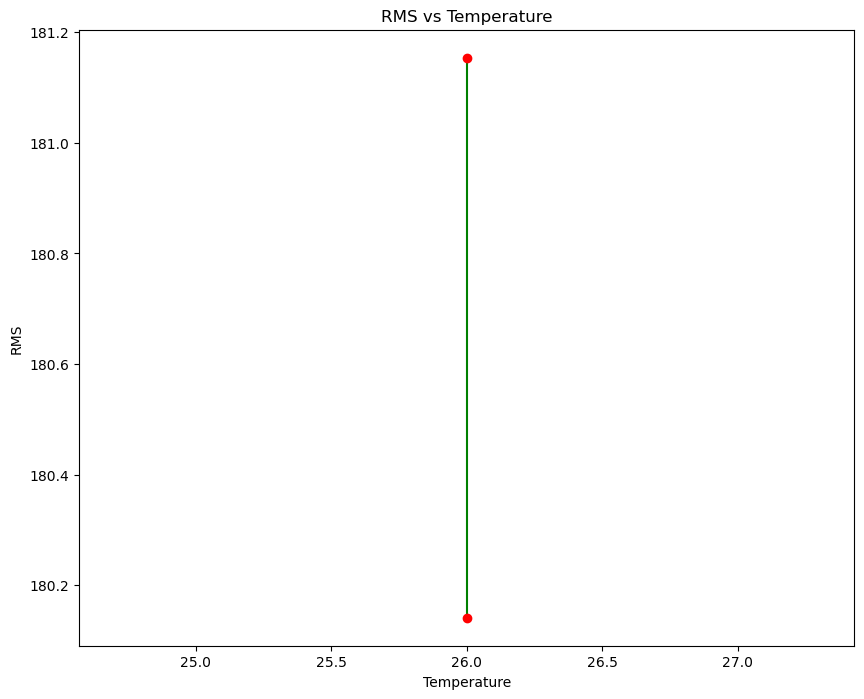

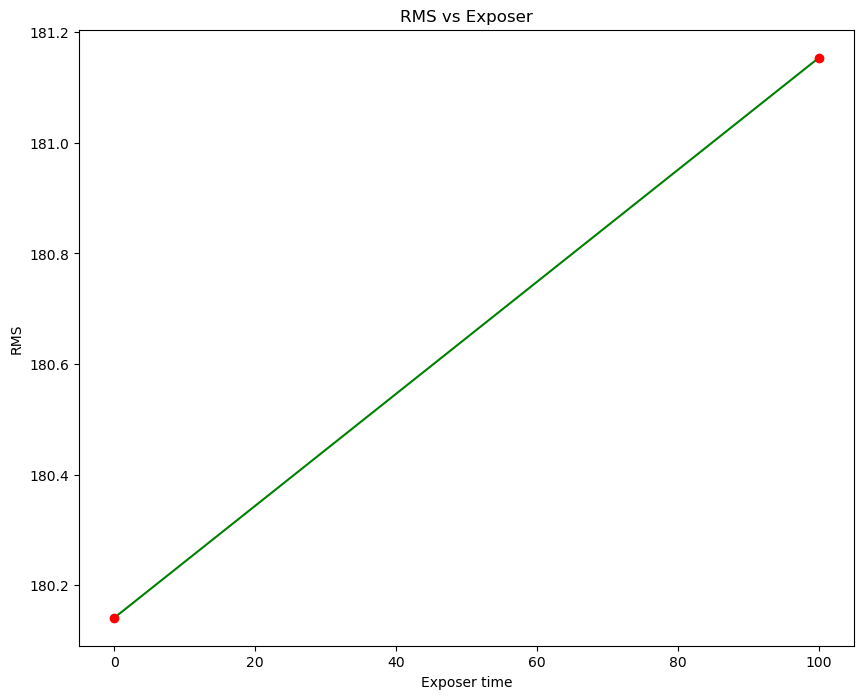

In [55]:
#plot the RMs vs temp
plt.figure(figsize=(10, 8))
plt.plot(Temp,rms_list,"-g")
plt.plot(Temp,rms_list,"or")

plt.xlabel('Temperature')
plt.ylabel('RMS')
plt.title('RMS vs Temperature')
plt.show()

#plot the RMs vs exp
plt.figure(figsize=(10, 8))
plt.plot(Expose,rms_list,"-g")
plt.plot(Expose,rms_list,"or")

plt.xlabel('Exposer time')
plt.ylabel('RMS')
plt.title('RMS vs Exposer')
plt.show()

In [4]:

def extract_exposure_and_temperature_v2(filenames,iff_exposer):
    extracted_exposer = []
    extracted_temp = []
    filename_list = []
    
    for filename in filenames:
        # Regular expression to extract exposure time and temperature (with p or m for temperature)
        match = re.search(r'(\d+)s_[\w-]*_(p|m)_(\d+)c', filename)
        
        if match:
            if match.group(1) == iff_exposer:

                exposure_time = int(match.group(1))  # Group 1 is the exposure time
                temp_sign = -1 if match.group(2) == 'm' else 1  # Group 2 is 'm' or 'p' for negative/positive temperature
                temperature = temp_sign * int(match.group(3))  # Group 3 is the temperature value
                
                extracted_exposer.append(exposure_time)
                extracted_temp.append(temperature)
                filename_list.append(filename)


    return filename_list,extracted_exposer,extracted_temp

directory = "/home/ashwin/GIT/IITK_notebooks/Optics Lab/ccd_data"  # Replace with the path to your FITS files
# Example list of file names
file_list = list_fits_files(directory)

# Extract exposure time and temperature
filename_list,exposure,temp = extract_exposure_and_temperature_v2(file_list,"60")

# Sorting based on array1
sorted_arrays = sorted(zip(temp, filename_list, exposure))

# Unzip the sorted arrays
array1_sorted, array2_sorted, array3_sorted = zip(*sorted_arrays)

# Convert back to lists (if needed)
temp = list(array1_sorted)
filename_list = list(array2_sorted)
exposure = list(array3_sorted)


# Print the results
for i in range(len(filename_list)):
    print(f"File: {filename_list[i]}, Exposure Time: {exposure[i]}s, Temperature: {temp[i]}°C")


File: 60s_dark_m_10c.fit, Exposure Time: 60s, Temperature: -10°C
File: 60s_dark_m_10c1.fit, Exposure Time: 60s, Temperature: -10°C
File: 60s_dark_m_10c2.fit, Exposure Time: 60s, Temperature: -10°C
File: 60s_dark_m_5c.fit, Exposure Time: 60s, Temperature: -5°C
File: 60s_dark_p_0c.fit, Exposure Time: 60s, Temperature: 0°C
File: 60s_dark_p_5c.fit, Exposure Time: 60s, Temperature: 5°C
File: 60s_dark_p_10c.fit, Exposure Time: 60s, Temperature: 10°C
File: 60s_dark_p_15c.fit, Exposure Time: 60s, Temperature: 15°C
File: 60s_dark_p_20c.fit, Exposure Time: 60s, Temperature: 20°C


/home/ashwin/GIT/IITK_notebooks/Optics Lab/ccd_data/60s_dark_m_10c.fit
Min: 217, Max: 65535, RMS: 348.7131663099758
/home/ashwin/GIT/IITK_notebooks/Optics Lab/ccd_data/60s_dark_m_10c_000.fit
Min: 217, Max: 65535, RMS: 342.9529900638389
/home/ashwin/GIT/IITK_notebooks/Optics Lab/ccd_data/60s_dark_m_10c_7.fit
Min: 215, Max: 65535, RMS: 342.8543421939707
/home/ashwin/GIT/IITK_notebooks/Optics Lab/ccd_data/60s_dark_m_5c_6.fit
Min: 216, Max: 65535, RMS: 347.06614217372714
/home/ashwin/GIT/IITK_notebooks/Optics Lab/ccd_data/60s_dark_p_0c_5.fit
Min: 214, Max: 65535, RMS: 355.0655756384269
/home/ashwin/GIT/IITK_notebooks/Optics Lab/ccd_data/60s_dark_p_5c_4.fit
Min: 214, Max: 65535, RMS: 366.89379669912984
/home/ashwin/GIT/IITK_notebooks/Optics Lab/ccd_data/60s_dark_p_10c_3.fit
Min: 219, Max: 65535, RMS: 389.07322364343474
/home/ashwin/GIT/IITK_notebooks/Optics Lab/ccd_data/60s_dark_p_15c2.fit
Min: 241, Max: 65535, RMS: 427.8174262957614
/home/ashwin/GIT/IITK_notebooks/Optics Lab/ccd_data/60s_d

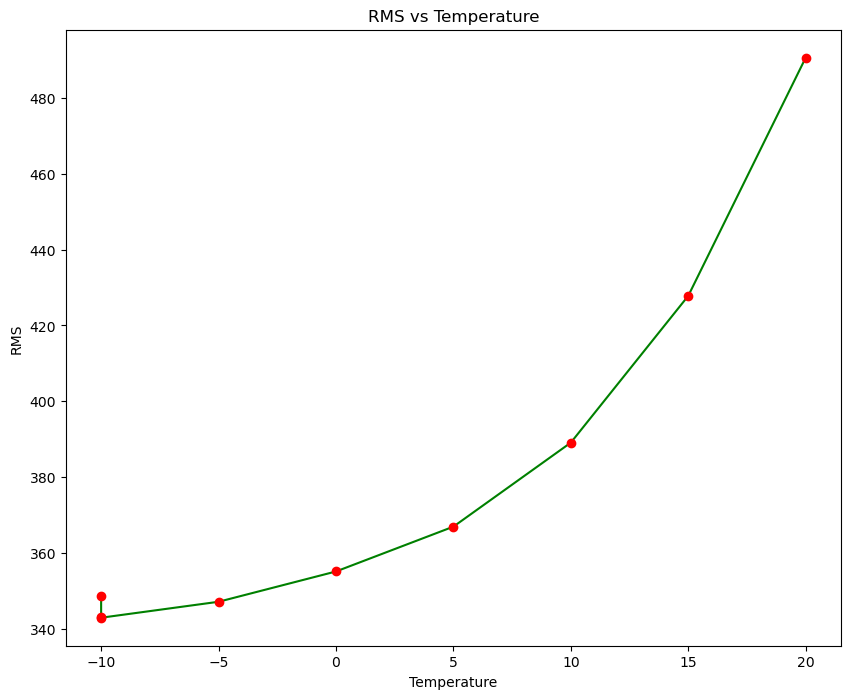

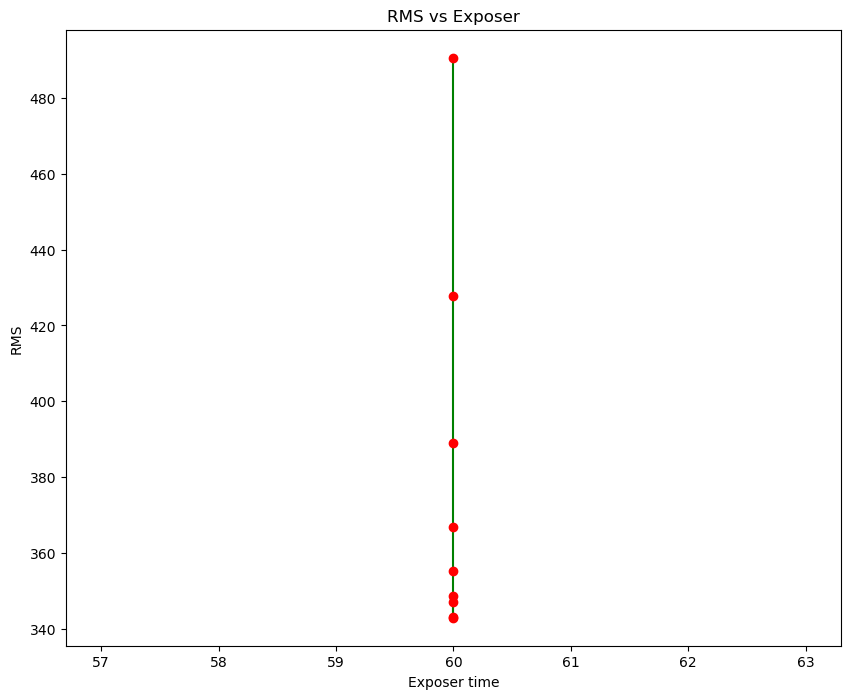

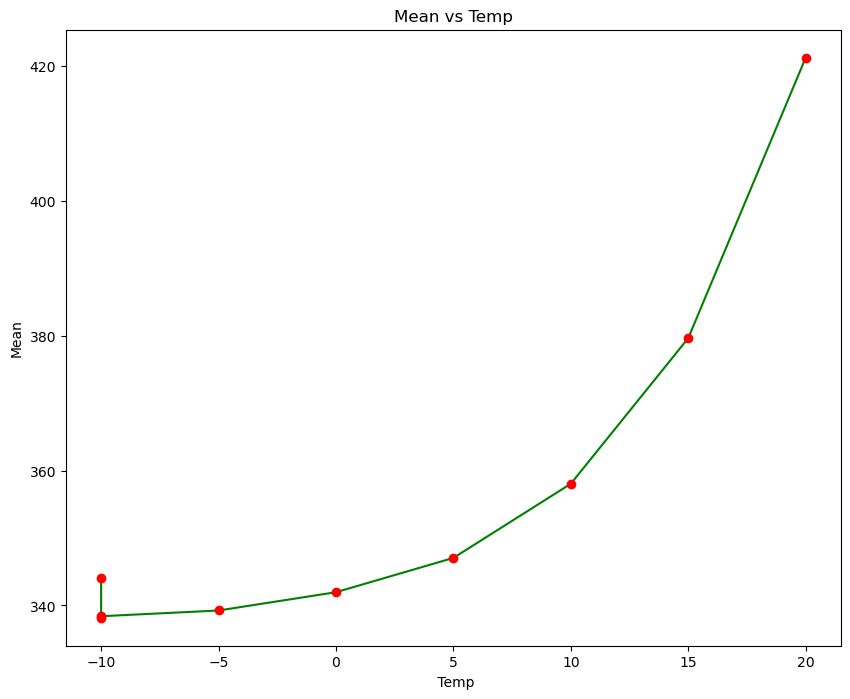

In [18]:

mean = []

rms_list = []
for file_path in filename_list:
    file_path = directory + '/' + file_path
    print(file_path)
    with fits.open(file_path) as hdul:
        image_data = hdul[0].data  # Extract the image data

        image_min = np.min(image_data)
        image_max = np.max(image_data)
        rms_value = np.sqrt(np.mean(np.abs(np.square(image_data))))
        rms_value = np.sqrt( np.square(np.mean(image_data) ) + np.var(image_data) )
        rms_list.append(rms_value)
        mean.append(np.mean(image_data))

        # Print min, max, and RMS for reference
        print(f"Min: {image_min}, Max: {image_max}, RMS: {rms_value}")

#plot the RMs vs temp
plt.figure(figsize=(10, 8))
plt.plot(temp,rms_list,"-g")
plt.plot(temp,rms_list,"or")

plt.xlabel('Temperature')
plt.ylabel('RMS')
plt.title('RMS vs Temperature')
plt.show()

#plot the RMs vs exp
plt.figure(figsize=(10, 8))
plt.plot(exposure,rms_list,"-g")
plt.plot(exposure,rms_list,"or")

plt.xlabel('Exposer time')
plt.ylabel('RMS')
plt.title('RMS vs Exposer')
plt.show()

#plot the Temp vs mean
plt.figure(figsize=(10, 8))
plt.plot(temp,mean,"-g")
plt.plot(temp,mean,"or")

plt.xlabel(' Temp')
plt.ylabel('Mean')
plt.title('Mean vs Temp')
plt.show()

In [5]:



print("Min:",  np.min(image_data))

print("Max:",  np.max(image_data))
print("mean:",  np.mean(image_data))
print("std:",  np.std(image_data))
print("median:",  np.median(image_data))

print("Variance:",  np.var(image_data))
rms_value = np.sqrt(np.nanmean(np.square(image_data)))
print("rms value:", rms_value)

print("vrms = ", np.sqrt( np.mean(np.square(image_data)) + np.var(image_data)  )) #rms value


NameError: name 'image_data' is not defined

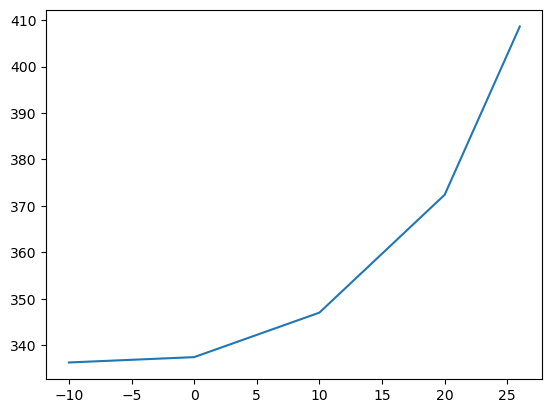

In [13]:
plt.plot([26,20,10,0,-10],[408.62,372.4,347.041,337.463,336.313])

File: 0s_dark_m_10c.fit, Exposure Time: 0s, Temperature: -10°C
File: 0s_dark_m_0c.fit, Exposure Time: 0s, Temperature: 0°C
File: 0s_dark_p_20c.fit, Exposure Time: 0s, Temperature: 20°C
File: 0s_dark_p_26c.fit, Exposure Time: 0s, Temperature: 26°C
/home/ashwin/GIT/IITK_notebooks/Optics Lab/ccd_data/0s_dark_m_10c.fit
Min: 211, Max: 1542, RMS: 336.45191318544465
/home/ashwin/GIT/IITK_notebooks/Optics Lab/ccd_data/0s_dark_m_0c.fit
Min: 208, Max: 1828, RMS: 337.5972111648601
/home/ashwin/GIT/IITK_notebooks/Optics Lab/ccd_data/0s_dark_p_20c.fit
Min: 238, Max: 4234, RMS: 372.5854651125378
/home/ashwin/GIT/IITK_notebooks/Optics Lab/ccd_data/0s_dark_p_26c.fit
Min: 266, Max: 6251, RMS: 408.74818702209257
File: 60s_dark_m_10c.fit, Exposure Time: 60s, Temperature: -10°C
File: 60s_dark_m_10c1.fit, Exposure Time: 60s, Temperature: -10°C
File: 60s_dark_m_10c2.fit, Exposure Time: 60s, Temperature: -10°C
File: 60s_dark_m_5c.fit, Exposure Time: 60s, Temperature: -5°C
File: 60s_dark_p_0c.fit, Exposure Ti

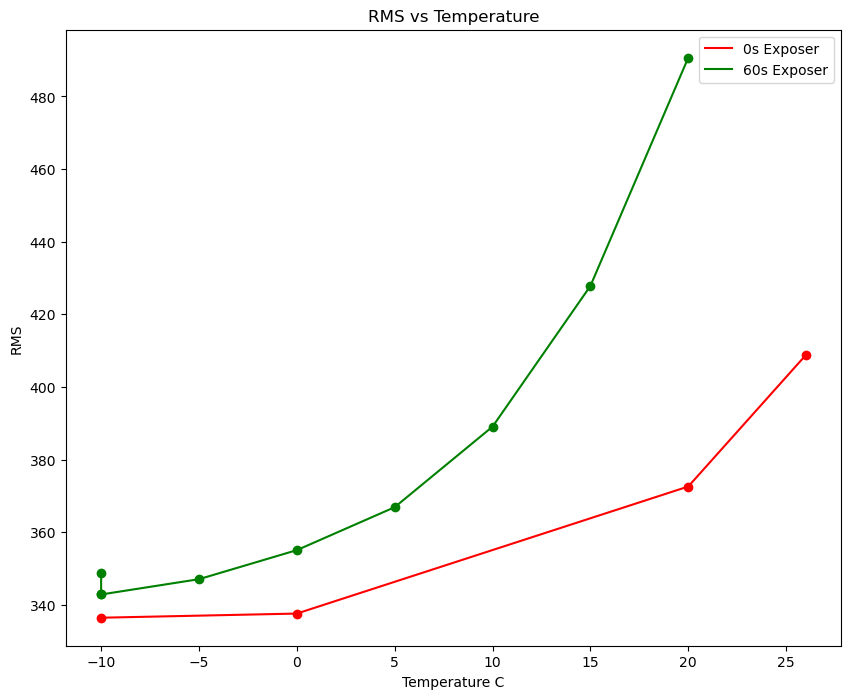

In [10]:


# Extract exposure time and temperature
filename_list,exposure,temp = extract_exposure_and_temperature_v2(file_list,"0")

# Sorting based on array1
sorted_arrays = sorted(zip(temp, filename_list, exposure))

# Unzip the sorted arrays
array1_sorted, array2_sorted, array3_sorted = zip(*sorted_arrays)

# Convert back to lists (if needed)
temp = list(array1_sorted)
filename_list = list(array2_sorted)
exposure = list(array3_sorted)


# Print the results
for i in range(len(filename_list)):
    print(f"File: {filename_list[i]}, Exposure Time: {exposure[i]}s, Temperature: {temp[i]}°C")


mean = []

rms_list = []
for file_path in filename_list:
    file_path = directory + '/' + file_path
    print(file_path)
    with fits.open(file_path) as hdul:
        image_data = hdul[0].data  # Extract the image data

        image_min = np.min(image_data)
        image_max = np.max(image_data)
        rms_value = np.sqrt(np.mean(np.abs(np.square(image_data))))
        rms_value = np.sqrt( np.square(np.mean(image_data) ) + np.var(image_data) )
        rms_list.append(rms_value)
        mean.append(np.mean(image_data))

        # Print min, max, and RMS for reference
        print(f"Min: {image_min}, Max: {image_max}, RMS: {rms_value}")

#plot the RMs vs temp
plt.figure(figsize=(10, 8))
plt.plot(temp,rms_list,"-r", label = "0s Exposer")
plt.plot(temp,rms_list,"or")








# Extract exposure time and temperature
filename_list,exposure,temp = extract_exposure_and_temperature_v2(file_list,"60")

# Sorting based on array1
sorted_arrays = sorted(zip(temp, filename_list, exposure))

# Unzip the sorted arrays
array1_sorted, array2_sorted, array3_sorted = zip(*sorted_arrays)

# Convert back to lists (if needed)
temp = list(array1_sorted)
filename_list = list(array2_sorted)
exposure = list(array3_sorted)


# Print the results
for i in range(len(filename_list)):
    print(f"File: {filename_list[i]}, Exposure Time: {exposure[i]}s, Temperature: {temp[i]}°C")


mean = []

rms_list = []
for file_path in filename_list:
    file_path = directory + '/' + file_path
    print(file_path)
    with fits.open(file_path) as hdul:
        image_data = hdul[0].data  # Extract the image data

        image_min = np.min(image_data)
        image_max = np.max(image_data)
        rms_value = np.sqrt(np.mean(np.abs(np.square(image_data))))
        rms_value = np.sqrt( np.square(np.mean(image_data) ) + np.var(image_data) )
        rms_list.append(rms_value)
        mean.append(np.mean(image_data))

        # Print min, max, and RMS for reference
        print(f"Min: {image_min}, Max: {image_max}, RMS: {rms_value}")

#plot the RMs vs temp

plt.plot(temp,rms_list,"-g",label = "60s Exposer")
plt.plot(temp,rms_list,"og")



# Extract exposure time and temperature
filename_list,exposure,temp = extract_exposure_and_temperature_v2(file_list,"100")

# Sorting based on array1
sorted_arrays = sorted(zip(temp, filename_list, exposure))

# Unzip the sorted arrays
array1_sorted, array2_sorted, array3_sorted = zip(*sorted_arrays)

# Convert back to lists (if needed)
temp = list(array1_sorted)
filename_list = list(array2_sorted)
exposure = list(array3_sorted)


# Print the results
for i in range(len(filename_list)):
    print(f"File: {filename_list[i]}, Exposure Time: {exposure[i]}s, Temperature: {temp[i]}°C")


mean = []
minval = 1000000
rms_list = []
for file_path in filename_list:
    file_path = directory + '/' + file_path
    print(file_path)
    with fits.open(file_path) as hdul:
        image_data = hdul[0].data  # Extract the image data

        image_min = np.min(image_data)
        image_max = np.max(image_data)

        rms_value = np.sqrt( np.square(np.mean(image_data) ) + np.var(image_data) ) 
        minval = min(minval,rms_value)

        rms_list.append(rms_value - minval )
        mean.append(np.mean(image_data))

        # Print min, max, and RMS for reference
        print(f"Min: {image_min}, Max: {image_max}, RMS: {rms_value}")

#plot the RMs vs temp

#plt.plot(temp,rms_list,"-b",label = "100s")
#plt.plot(temp,rms_list,"ob")





plt.xlabel('Temperature C')
plt.ylabel('RMS')
plt.title('RMS vs Temperature')
plt.legend()
plt.show()




In [7]:

def extract_exposure_and_temperature_v2_temp(filenames,iff_temp):
    extracted_exposer = []
    extracted_temp = []
    filename_list = []
    
    for filename in filenames:
        # Regular expression to extract exposure time and temperature (with p or m for temperature)
        match = re.search(r'(\d+)s_[\w-]*_(p|m)_(\d+)c', filename)
        
        if match:
            if match.group(3) == iff_temp:

                exposure_time = int(match.group(1))  # Group 1 is the exposure time
                temp_sign = -1 if match.group(2) == 'm' else 1  # Group 2 is 'm' or 'p' for negative/positive temperature
                temperature = temp_sign * int(match.group(3))  # Group 3 is the temperature value
                
                extracted_exposer.append(exposure_time)
                extracted_temp.append(temperature)
                filename_list.append(filename)


    return filename_list,extracted_exposer,extracted_temp

File: 0s_dark_m_10c.fit, Exposure Time: 0s, Temperature: -10°C
File: 60s_dark_m_10c.fit, Exposure Time: 60s, Temperature: -10°C
File: 60s_dark_m_10c1.fit, Exposure Time: 60s, Temperature: -10°C
File: 60s_dark_m_10c2.fit, Exposure Time: 60s, Temperature: -10°C
File: 60s_dark_p_10c.fit, Exposure Time: 60s, Temperature: 10°C
/home/ashwin/GIT/IITK_notebooks/Optics Lab/ccd_data/0s_dark_m_10c.fit
Min: 211, Max: 1542, RMS: 336.45191318544465
/home/ashwin/GIT/IITK_notebooks/Optics Lab/ccd_data/60s_dark_m_10c.fit
Min: 217, Max: 65535, RMS: 348.7131663099758
/home/ashwin/GIT/IITK_notebooks/Optics Lab/ccd_data/60s_dark_m_10c1.fit
Min: 217, Max: 65535, RMS: 342.9529900638389
/home/ashwin/GIT/IITK_notebooks/Optics Lab/ccd_data/60s_dark_m_10c2.fit
Min: 215, Max: 65535, RMS: 342.8543421939707
/home/ashwin/GIT/IITK_notebooks/Optics Lab/ccd_data/60s_dark_p_10c.fit
Min: 219, Max: 65535, RMS: 389.07322364343474


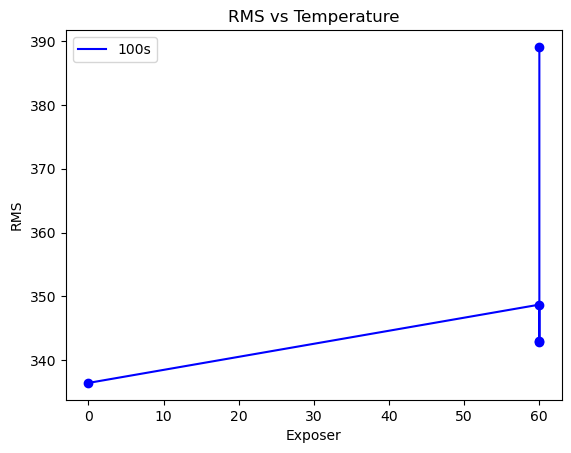

In [8]:

# Extract exposure time and temperature
filename_list,exposure,temp = extract_exposure_and_temperature_v2_temp(list_fits_files(directory) ,"10")

# Sorting based on array1
sorted_arrays = sorted(zip(temp, filename_list, exposure))

# Unzip the sorted arrays
array1_sorted, array2_sorted, array3_sorted = zip(*sorted_arrays)

# Convert back to lists (if needed)
temp = list(array1_sorted)
filename_list = list(array2_sorted)
exposure = list(array3_sorted)


# Print the results
for i in range(len(filename_list)):
    print(f"File: {filename_list[i]}, Exposure Time: {exposure[i]}s, Temperature: {temp[i]}°C")


mean = []

rms_list = []
for file_path in filename_list:
    file_path = directory + '/' + file_path
    print(file_path)
    with fits.open(file_path) as hdul:
        image_data = hdul[0].data  # Extract the image data

        image_min = np.min(image_data)
        image_max = np.max(image_data)
        rms_value = np.sqrt(np.mean(np.abs(np.square(image_data))))
        rms_value = np.sqrt( np.square(np.mean(image_data) ) + np.var(image_data) )
        rms_list.append(rms_value)
        mean.append(np.mean(image_data))

        # Print min, max, and RMS for reference
        print(f"Min: {image_min}, Max: {image_max}, RMS: {rms_value}")

#plot the RMs vs temp

plt.plot(exposure,rms_list,"-b",label = "100s")
plt.plot(exposure,rms_list,"ob")


plt.xlabel('Exposer')
plt.ylabel('RMS')
plt.title('RMS vs Temperature')
plt.legend()
plt.show()



Min =  276
Max =  65535
Mean =  421.22641709184785
Std =  251.66228667183816
Var =  63333.90653289845
Median =  415.0
RMS =  182.46751887546
VRMS =  490.67871462794653


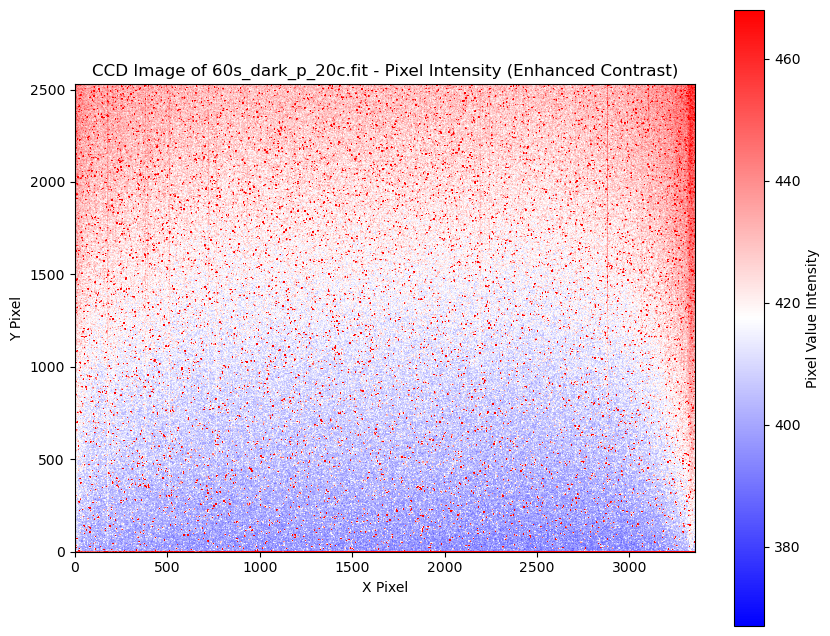

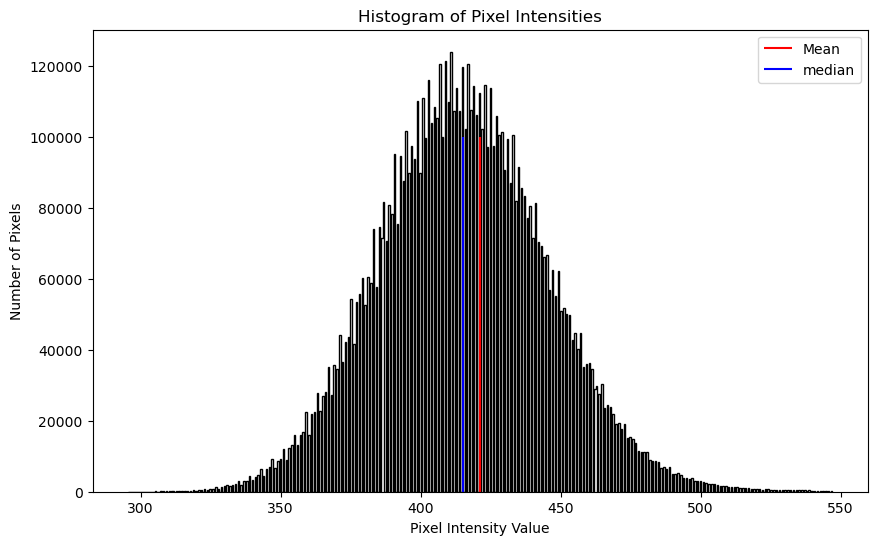

In [53]:
fits_file_o = '60s_dark_p_20c.fit'
fits_file = os.path.join(directory, fits_file_o)
hdulist = fits.open(fits_file)
image_data = hdulist[0].data  

hdulist.close()

# Plot the histogram of the image pixel values
mean =  np.mean(image_data)
std = np.std(image_data)
var = np.var(image_data)
median = np.median(image_data)
rms = np.sqrt(np.mean(np.square(image_data)))
RMS = np.sqrt( np.square(np.mean(image_data) ) + np.var(image_data) )

print( "Min = ", np.min(image_data))
print( "Max = ", np.max(image_data))


print( "Mean = ", mean)
print( "Std = ", std)
print( "Var = ", var)
print( "Median = ", median)
print( "RMS = ", rms)
print( "VRMS = ", RMS)



# Plot the noise image with adjusted contrast
plt.figure(figsize=(10, 8))

# Adjust display limits to the 5th and 95th percentiles to enhance contrast
vmin, vmax = np.percentile(image_data, [5, 95])

plt.imshow(image_data, cmap='bwr', origin='lower', vmin=vmin, vmax=vmax)
plt.colorbar(label='Pixel Value Intensity')
plt.title(f'CCD Image of {fits_file_o} - Pixel Intensity (Enhanced Contrast)')
plt.xlabel('X Pixel')
plt.ylabel('Y Pixel')
plt.show()

plt.figure(figsize=(10, 6))
plt.hist(image_data.ravel(), bins=500, range=[mean - std/2, mean + std/2], histtype='step', color='black')
plt.vlines(mean, 0, 100000, color='red', linestyle='-', label='Mean')
plt.vlines(median, 0, 100000, color='blue', linestyle='-', label='median')


# Adding labels and title
plt.title('Histogram of Pixel Intensities')
plt.xlabel('Pixel Intensity Value')
plt.ylabel('Number of Pixels')
plt.legend()
# Show the plot
plt.show()

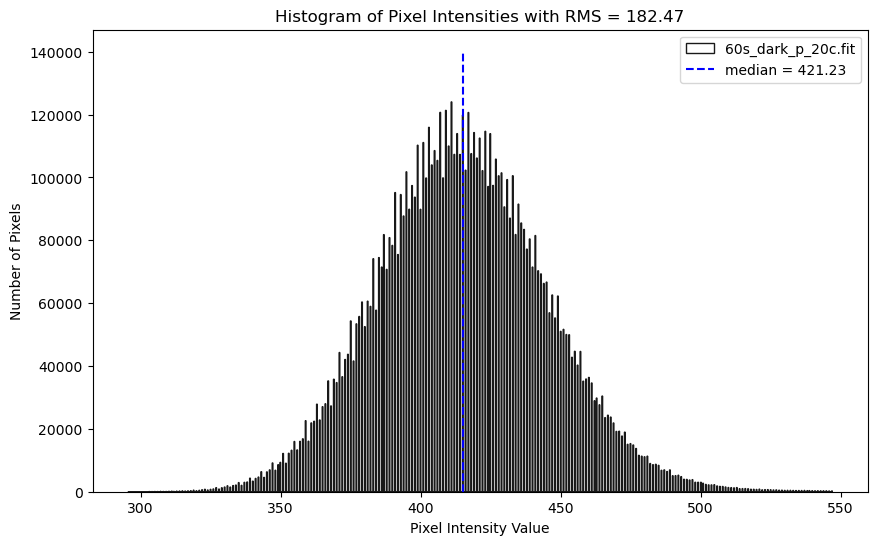

In [51]:

plt.figure(figsize=(10, 6))
plt.hist(image_data.ravel(), bins=1000, range=[mean - std/2, mean + std/2], histtype='step', color='black',label=f"{fits_file_o}",alpha = 0.9)
#plt.vlines(mean, 0, 100000, color='red', linestyle='--', label='Mean')
plt.vlines(median, 0, 140000, color='blue', linestyle='--', label=f'median = {round(mean,2)}')


# Adding labels and title
plt.title(f'Histogram of Pixel Intensities with RMS = {rms:.2f}')
plt.xlabel('Pixel Intensity Value')
plt.ylabel('Number of Pixels')
plt.legend()
#plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), frameon=False)

# Show the plot
plt.show()

Min =  217
Max =  65535
Mean =  344.0512002335225
Std =  56.829956676047935
Var =  3229.6439758014853
Median =  343.0
RMS =  195.5806355744193
VRMS =  348.7131663099758
Min =  219
Max =  65535
Mean =  358.0508318178185
Std =  152.2418312779455
Var =  23177.575190862426
Median =  355.0
RMS =  189.56531312757693
VRMS =  389.07322364343474
Min =  276
Max =  65535
Mean =  421.22641709184785
Std =  251.66228667183816
Var =  63333.90653289845
Median =  415.0
RMS =  182.46751887546
VRMS =  490.67871462794653
Min =  387
Max =  65535
Mean =  584.1875725189471
Std =  431.6740499667565
Var =  186342.4854147018
Median =  567.0
RMS =  181.15394377039618
VRMS =  726.3729106321916


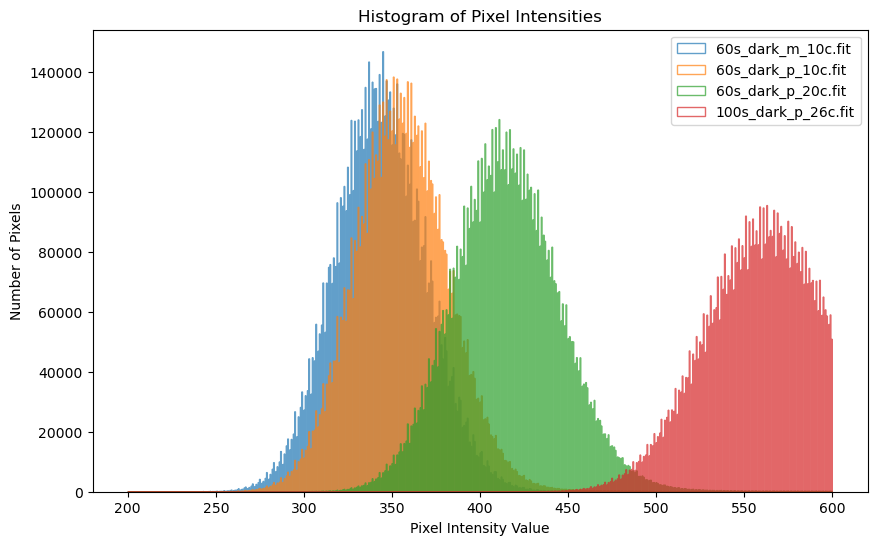

In [12]:
def plotHist(fits_file):

    hdulist = fits.open(os.path.join(directory, fits_file))
    image_data = hdulist[0].data  

    hdulist.close()

    # Plot the histogram of the image pixel values
    mean =  np.mean(image_data)
    std = np.std(image_data)
    var = np.var(image_data)
    median = np.median(image_data)
    rms = np.sqrt(np.mean(np.square(image_data)))
    RMS = np.sqrt( np.square(np.mean(image_data) ) + np.var(image_data) )

    print( "Min = ", np.min(image_data))
    print( "Max = ", np.max(image_data))

    print( "Mean = ", mean)
    print( "Std = ", std)
    print( "Var = ", var)
    print( "Median = ", median)
    print( "RMS = ", rms)
    print( "VRMS = ", RMS)


    plt.hist(image_data.ravel(), bins=1000, range=[200, 600], histtype='step', label=fits_file, alpha = 0.7 )


plt.figure(figsize=(10, 6))
fits_file = '60s_dark_m_10c.fit'  
plotHist(fits_file)

fits_file = '60s_dark_p_10c.fit'  
plotHist(fits_file)


fits_file = '60s_dark_p_20c.fit'  
plotHist(fits_file)

fits_file = '100s_dark_p_26c.fit'  
plotHist(fits_file)

# Adding labels and title
plt.title('Histogram of Pixel Intensities')
plt.xlabel('Pixel Intensity Value')
plt.ylabel('Number of Pixels')
plt.legend()
# Show the plot
plt.show()

In [49]:
print(os.listdir(directory) )

['60s_dark_m_10c1.fit', '60s_dark_m_5c.fit', '0s_dark_p_20c.fit', '100s_dark_p_26c.fit', '0s_dark_p_26c.fit', '60s_dark_p_10c.fit', '60s_dark_m_10c.fit', '60s_dark_p_15c.fit', '0s_dark_m_10c.fit', 'CCD Characterization file.xlsx', '60s_dark_p_0c.fit', '0s_dark_m_0c.fit', '60s_dark_m_10c2.fit', '60s_dark_p_5c.fit', '60s_dark_p_20c.fit']


Min =  211
Max =  1542
Mean =  335.41122372252886
Std =  26.44240698389012
Var =  699.200887101681
Median =  335.0
RMS =  195.87589025977488
VRMS =  336.45191318544465
Min =  266
Max =  6251
Mean =  407.5998064668097
Std =  30.618265170758278
Var =  937.4781620668695
Median =  407.0
RMS =  180.14113050417296
VRMS =  408.74818702209257
Min =  216
Max =  65535
Mean =  339.2560368891992
Std =  73.21371782383457
Var =  5360.248477588073
Median =  338.0
RMS =  196.32880932861764
VRMS =  347.06614217372714
Min =  387
Max =  65535
Mean =  584.1875725189471
Std =  431.6740499667565
Var =  186342.4854147018
Median =  567.0
RMS =  181.15394377039618
VRMS =  726.3729106321916


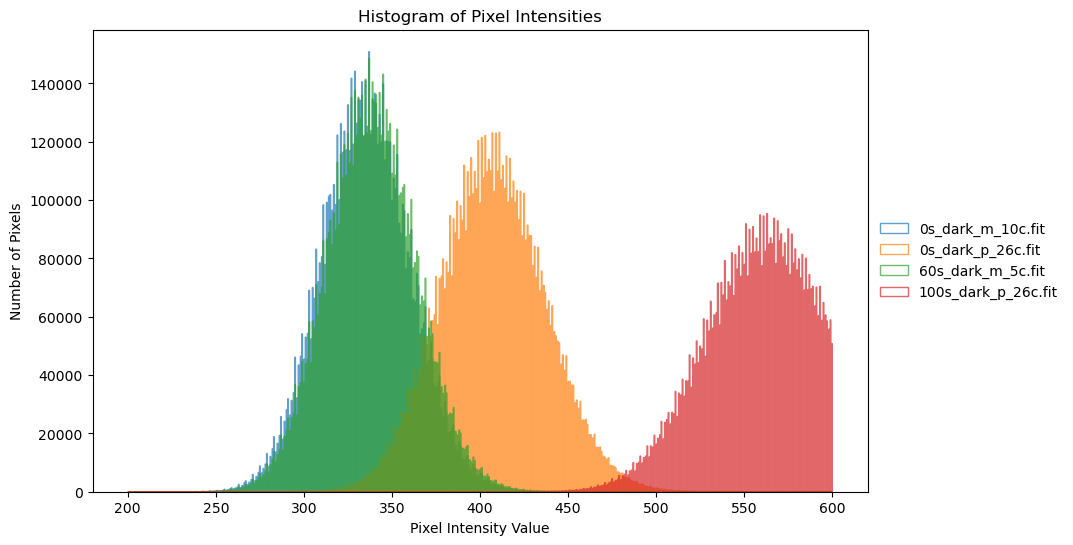

In [19]:

plt.figure(figsize=(10, 6))
fits_file = '0s_dark_m_10c.fit'
plotHist(fits_file)

fits_file = '0s_dark_p_26c.fit' 
plotHist(fits_file)
fits_file =  '60s_dark_m_5c.fit'
plotHist(fits_file)


fits_file = '100s_dark_p_26c.fit'  
plotHist(fits_file)

# Adding labels and title
plt.title('Histogram of Pixel Intensities')
plt.xlabel('Pixel Intensity Value')
plt.ylabel('Number of Pixels')
plt.legend()
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), frameon=False)

# Show the plot
plt.show()